# Part 3 - Filters and convolutions

----------
### Slides covering basics of filters and filter kernels
----------

## Filtering images

In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from skimage import io, color, util, morphology
from skimage import filters, transform, exposure
from skimage.filters import rank
from scipy import ndimage

/anaconda3/envs/ImPyClass/lib/python3.6/site-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "


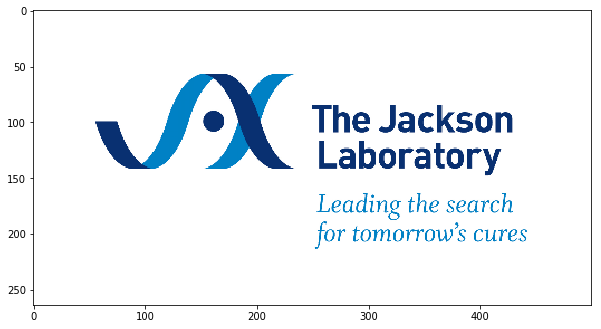

In [2]:
# EXPLAIN THIS

jax = io.imread('../data/jax.jpeg')
jax = transform.rescale(jax, .258)
matplotlib.rcParams['figure.figsize'] = [10.0, 10.0] 
plt.imshow(jax);

dtype('float64')

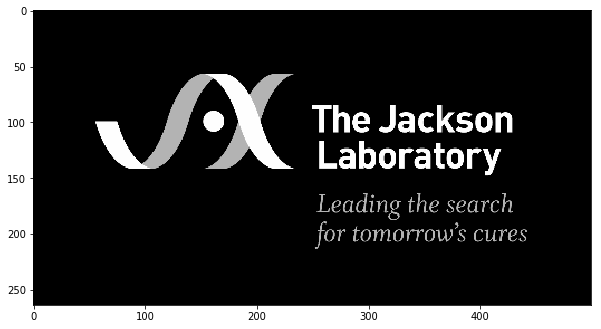

In [3]:
# EXPLAIN THIS
jax_gray = color.rgb2gray(jax)
jax_gray = util.invert(jax_gray)
plt.imshow(jax_gray, cmap='gray');
jax_gray.dtype #note the data type

/anaconda3/envs/ImPyClass/lib/python3.6/site-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from float64 to uint8
  .format(dtypeobj_in, dtypeobj_out))


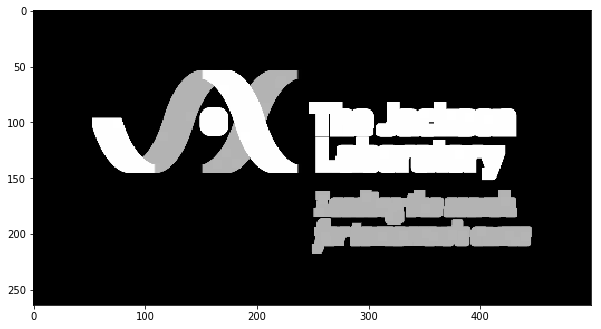

In [4]:
# Now lets apply a max filter

# first need to create a "window"
window = morphology.square(8) #play with the size of the window!

jax_max = rank.maximum(jax_gray, window)
plt.imshow(jax_max, cmap='gray');

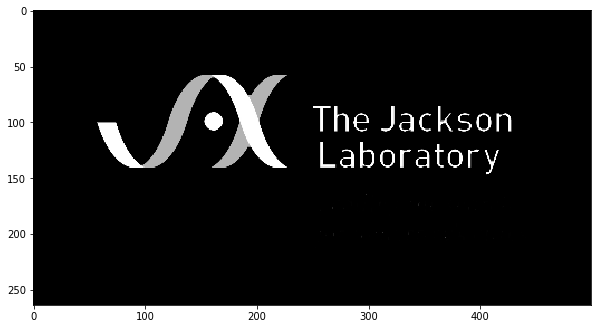

In [5]:
# Here is the same with a "min" filter

window = morphology.square(3) #play with the size of the window!
jax_min = rank.minimum(jax_gray, window)
plt.imshow(jax_min, cmap='gray');

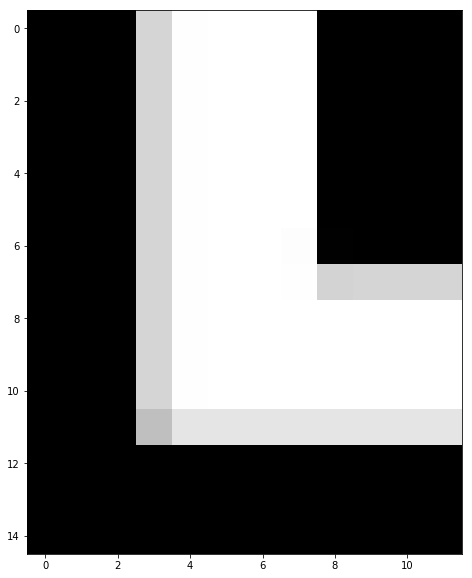

In [6]:
# lets convert the image to 'uint8' to make the arrays easier to look at
jax_gray = util.img_as_ubyte(jax_gray)

# Look at the pixels around the 'L' in Laboratory
letter_l = jax_gray[130:145,253:265]
plt.imshow(letter_l, cmap = 'gray');

In [7]:
letter_l

array([[  0,   0,   0, 176, 210, 211, 211, 211,   0,   0,   0,   0],
       [  0,   0,   0, 176, 210, 211, 211, 211,   0,   0,   0,   0],
       [  0,   0,   0, 176, 210, 211, 211, 211,   0,   0,   0,   0],
       [  0,   0,   0, 176, 210, 211, 211, 211,   0,   0,   0,   0],
       [  0,   0,   0, 176, 210, 211, 211, 211,   0,   0,   0,   0],
       [  0,   0,   0, 176, 210, 211, 211, 211,   0,   0,   0,   0],
       [  0,   0,   0, 176, 210, 211, 211, 209,   1,   0,   0,   0],
       [  0,   0,   0, 176, 210, 211, 211, 210, 175, 176, 176, 176],
       [  0,   0,   0, 176, 210, 211, 211, 211, 211, 211, 211, 211],
       [  0,   0,   0, 176, 210, 211, 211, 211, 211, 211, 211, 211],
       [  0,   0,   0, 176, 210, 211, 211, 211, 211, 211, 211, 211],
       [  0,   0,   0, 158, 189, 189, 189, 189, 189, 189, 189, 189],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,  

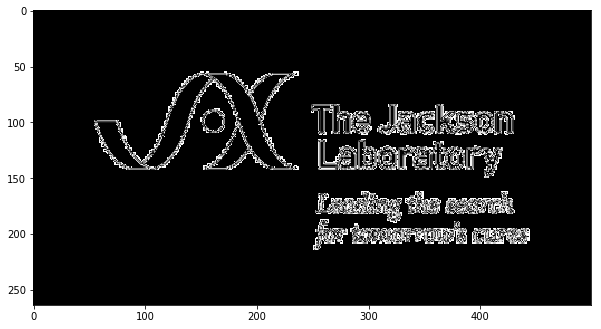

In [8]:
# To do a convolution with a kernel we supply, we need to use another package, scipy.ndimage
#ndimage works on numpy arrays like scikit-image, so it is straightford to go back and forth

kernel = np.array([[-1, -1, -1],
                   [-1,  8, -1],
                   [-1, -1, -1]])

jax_edge = ndimage.convolve(jax_gray, kernel)
plt.imshow(jax_edge, cmap='gray');

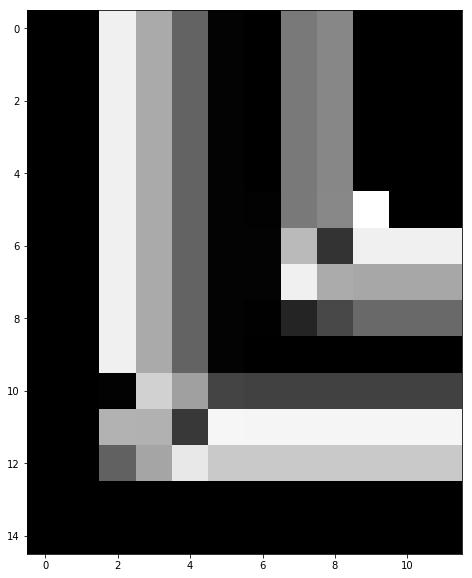

In [9]:
hollow_l = jax_edge[130:145,253:265]
plt.imshow(hollow_l, cmap = 'gray');

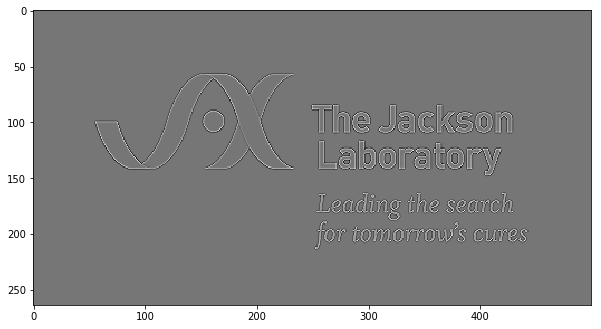

In [10]:
# The kernel we used above:

# -1 -1 -1
# -1  8 -1
# -1 -1 -1

# is actually a discrete approximation of the Laplacian
# We can apply a more exact Laplacian with scikit-image,
# but the data are output as signed floating point and need to be normalized

jax_edge2 = filters.laplace(jax_gray)

plt.imshow(jax_edge2, cmap='gray');

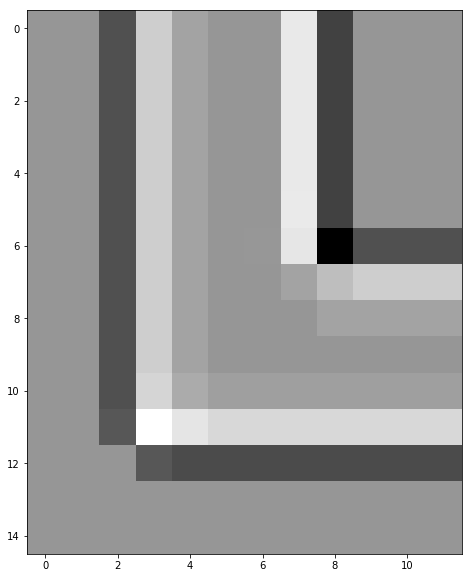

In [11]:
plt.imshow(jax_edge2[130:145, 253:265], cmap='gray');

In [12]:
jax_edge2[130:145, 253:265]

array([[ 0.        ,  0.        , -0.69019608,  0.55686275,  0.12941176,
         0.00392157,  0.        ,  0.82745098, -0.82745098,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        , -0.69019608,  0.55686275,  0.12941176,
         0.00392157,  0.        ,  0.82745098, -0.82745098,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        , -0.69019608,  0.55686275,  0.12941176,
         0.00392157,  0.        ,  0.82745098, -0.82745098,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        , -0.69019608,  0.55686275,  0.12941176,
         0.00392157,  0.        ,  0.82745098, -0.82745098,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        , -0.69019608,  0.55686275,  0.12941176,
         0.00392157,  0.        ,  0.82745098, -0.82745098,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        , -0.69019608,  0.55686275,  0.12941176,
         0.00392157,  

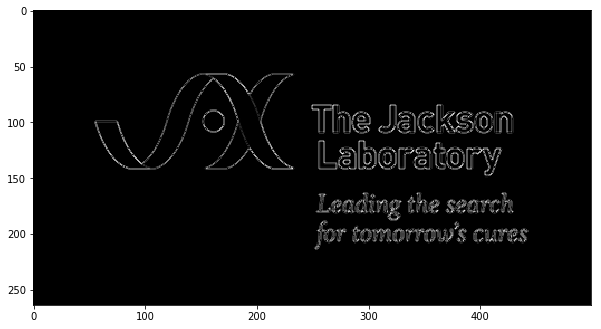

In [13]:
# To make our laplacian-filtered image a little easier to look at,
#We should rescale range and convery to 'uint8'

jax_edge3 = abs(jax_edge2)
jax_edge3 = exposure.rescale_intensity(jax_edge3)
jax_edge3 = util.img_as_ubyte(jax_edge3)
plt.imshow(jax_edge3, cmap='gray'); #why does this look so much better?

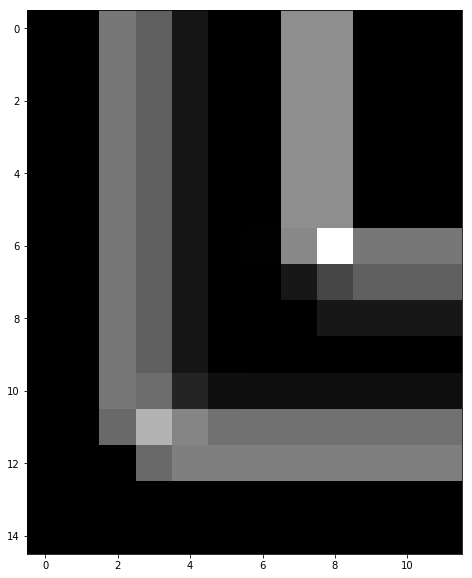

In [14]:
plt.imshow(jax_edge3[130:145, 253:265], cmap='gray')

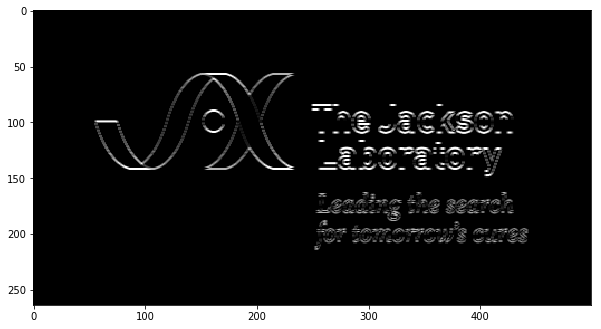

In [15]:
# scikit-image has a great set of filters
# prewitt-horizontal:
# 1  1  1
# 0  0  0
#-1 -1 -1

jax2_h_edges = filters.prewitt_h(jax_gray)

#normalize
jax2_h_edges = abs(jax2_h_edges)
jax2_h_edges = exposure.rescale_intensity(jax2_h_edges)
jax2_h_edges = util.img_as_ubyte(jax2_h_edges)

plt.imshow(jax2_h_edges, cmap='gray');

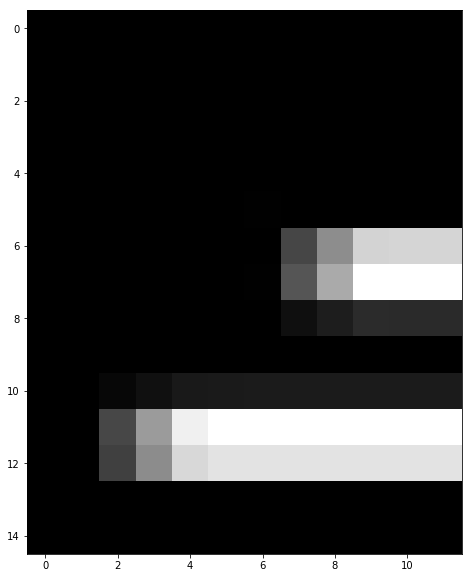

In [16]:
plt.imshow(jax2_h_edges[130:145, 253:265], cmap='gray');

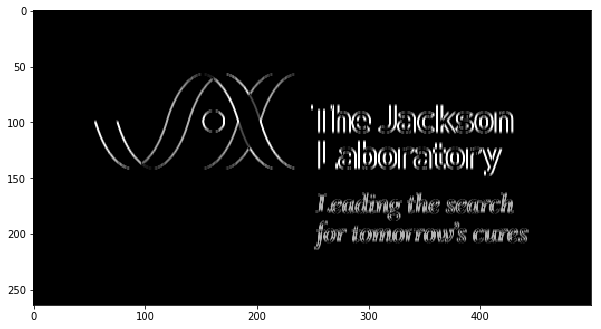

In [17]:
# prewitt-vertical:
# 1  0 -1
# 1  0 -1
# 1  0 -1

jax2_v_edges = filters.prewitt_v(jax_gray)

#normalize
jax2_v_edges = abs(jax2_v_edges)
jax2_v_edges = exposure.rescale_intensity(jax2_v_edges)
jax2_v_edges = util.img_as_ubyte(jax2_v_edges)

plt.imshow(jax2_v_edges, cmap='gray');

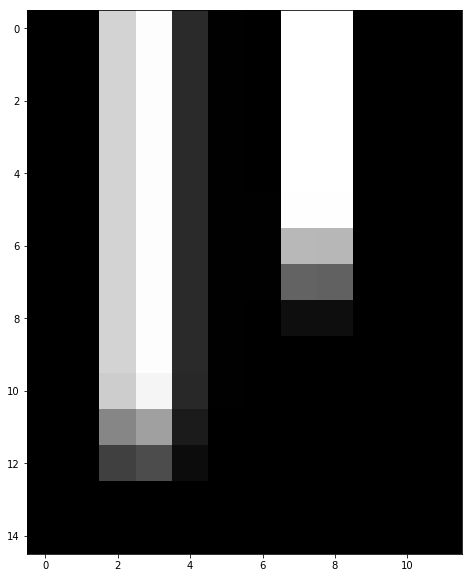

In [18]:
plt.imshow(jax2_v_edges[130:145, 253:265], cmap='gray');

In [19]:
from skimage import data
image = data.astronaut()

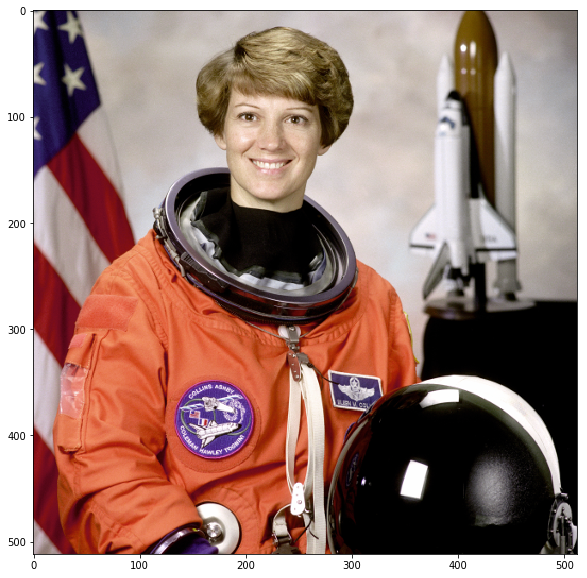

In [20]:
plt.imshow(image);

## Exercise

1. Convert the astronaut image to grayscale and highlight edges in the picture.
2. Thicken the edges to make them stand out better.

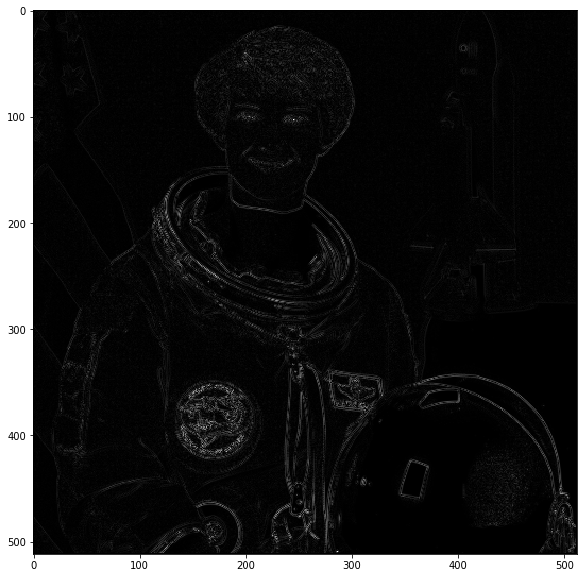

In [24]:
image = color.rgb2gray(image)

edges = filters.laplace(image)

edges = abs(edges)
edges = exposure.rescale_intensity(edges)
edges = util.img_as_ubyte(edges)

plt.imshow(edges, cmap='gray');

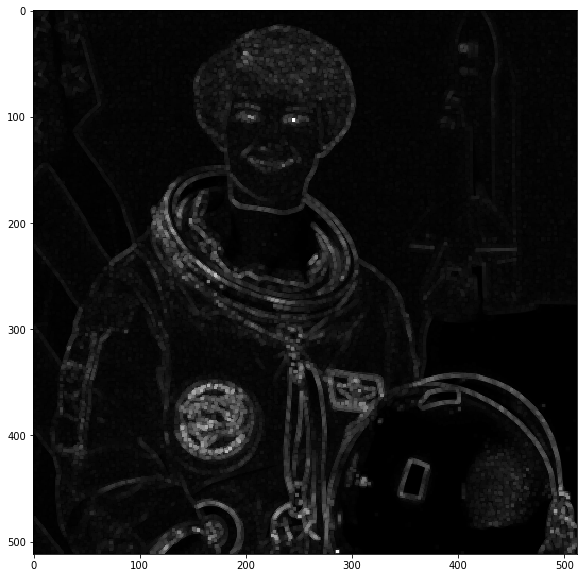

In [27]:
window = morphology.square(3)
thick_edges = rank.maximum(edges, window)
plt.imshow(thick_edges, cmap='gray')

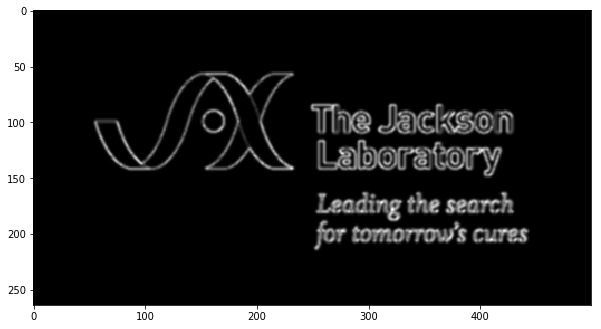

In [22]:
# Sometimes it is useful to apply a blur to noisy images

sigma=1 #play with this parameter
jax_blur = filters.gaussian(jax_edge3, sigma=sigma)
plt.imshow(jax_blur, cmap='gray');

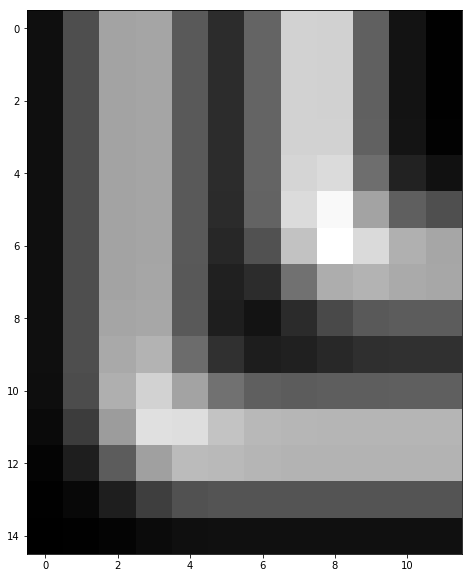

In [23]:
plt.imshow(jax_blur[130:145, 253:265], cmap='gray');